In [44]:
import pandas as pd
from urllib.request import Request, urlopen
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import re
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
import tensorflow as tf
pd.set_option('display.max_rows', None)

In [45]:
df=pd.read_csv('../processed_data/price_df_10mins_furtherpreprocess_24hvol.csv')
df['tx_timestamp'] = pd.to_datetime(df['tx_timestamp'],unit='ns')
df = df.rename(columns = {"tx_timestamp":"timestamp","0":"volatility"})
display(df.head(3))
df.tail()
df = df.set_index('timestamp')
vol_df =df['24rolling_vol']*np.sqrt(365)

,Unnamed: 0,timestamp,first,last,mean,vol_of_vol,max,min,ret,24rolling_vol
0,0,2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,NaN,201.177211,201.177211,0.0,NaN
1,1,2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='timestamp'>

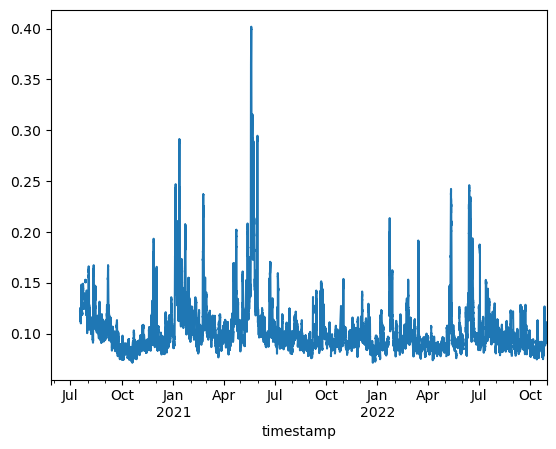

In [106]:
vol_df.plot()

In [47]:
vol_df.min()

0.07145312882840953

In [108]:
vol_df = vol_df.fillna(method= 'ffill')

In [48]:
vol_df.max()

0.4018414022471649

In [49]:
df_price = df.iloc[:,1:-2]
df_price = df_price.drop(columns = 'vol_of_vol')

In [50]:
df_price.head()

,first,last,mean,max,min
timestamp,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:30:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:40:00+00:00,NaN,NaN,NaN,NaN,NaN


In [51]:
df_final  = pd.concat([df_price,vol_df],axis =1)

In [52]:
df_final.head()

,first,last,mean,max,min,24rolling_vol
timestamp,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,NaN
2020-05-26 21:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26 21:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = df_final
df = df.fillna(method = 'ffill')
df = df.fillna(0)

In [54]:
df.head()

,first,last,mean,max,min,24rolling_vol
timestamp,,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.0
2020-05-26 21:10:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.0
2020-05-26 21:20:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.0
2020-05-26 21:30:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.0
2020-05-26 21:40:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211,0.0


In [55]:
df.tail()


,first,last,mean,max,min,24rolling_vol
timestamp,,,,,,
2022-10-30 13:50:00+00:00,1593.069968,1591.725668,1590.000000,1593.592900,1582.369607,0.091792
2022-10-30 14:00:00+00:00,1591.752575,1579.893707,1585.600000,1591.752575,1579.893707,0.091673
2022-10-30 14:10:00+00:00,1579.795094,1581.087842,1586.562500,1590.615992,1579.691428,0.091597
2022-10-30 14:20:00+00:00,1581.079224,1595.250643,1590.357143,1595.250643,1581.079224,0.092790
2022-10-30 14:30:00+00:00,1585.692455,1595.494499,1591.666667,1595.494499,1585.692455,0.092494


In [56]:
df.max()

first            4876.766356
last             4868.720287
mean             4857.065217
max              4992.566817
min              4839.060767
24rolling_vol       0.401841
dtype: float64

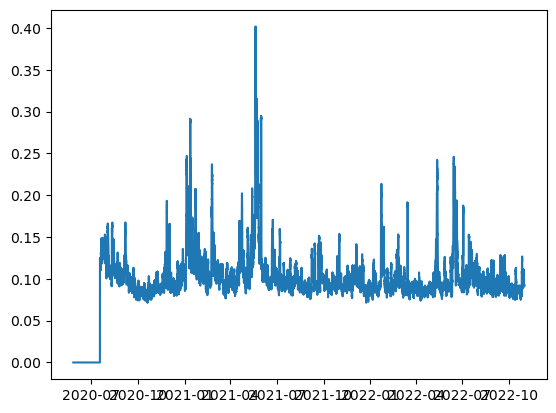

In [57]:
plt.plot(df.index,df['24rolling_vol'])

In [58]:
df.shape

(127690, 6)

In [59]:
train_start = '2020-05-26'
train_end = '2022-07-31'
dev_start = '2022-08-01'
dev_end = '2022-09-30'
test_start = '2022-10-01'
test_end = '2022-10-31'

In [60]:
df = df.iloc[:,:-1]

In [61]:
df.head()

,first,last,mean,max,min
timestamp,,,,,
2020-05-26 21:00:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:10:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:20:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:30:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211
2020-05-26 21:40:00+00:00,201.177211,201.177211,201.0,201.177211,201.177211


In [62]:
train_dates = df[((df.index >= train_start) & (df.index <= train_end))].values
dev_dates = df[((df.index >= dev_start) & (df.index <= dev_end))].values
test_dates = df[((df.index >= test_start) & (df.index <= test_end))].values
train_dates.shape, dev_dates.shape, test_dates.shape

((114499, 5), (8641, 5), (4264, 5))

In [109]:
train_y =  vol_df.fillna(0)[((vol_df.index >= train_start) & (vol_df.index <= train_end))].values
dev_y =  vol_df.fillna(0)[((vol_df.index >= dev_start) & (vol_df.index <= dev_end))].values

In [64]:
#https://www.section.io/engineering-education/univariate-time-series-using-recurrent-neural-networks/
#from sklearn.preprocessing import MinMaxScaler
# since it's the price we will scale it
scaler = MinMaxScaler()
scaler.fit(train_dates)
scaler.fit(dev_dates)
scaler.fit(test_dates)

scaled_train_dates = scaler.transform(train_dates)
scaled_dev_dates = scaler.transform(dev_dates)
scaled_test_dates = scaler.transform(test_dates)

In [65]:
scaled_train_dates

array([[-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       [-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       [-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       ...,
       [ 1.12028032,  1.10873232,  1.11368395,  0.43852195,  1.06816111],
       [ 1.0968996 ,  1.11142645,  1.10620272,  0.44091105,  1.06809422],
       [ 1.09991385,  1.10735899,  1.11715152,  0.44656993,  1.06988184]])

In [66]:
scaled_train_dates

array([[-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       [-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       [-2.30469663, -2.28314282, -2.32049242, -0.92212009, -0.9492394 ],
       ...,
       [ 1.12028032,  1.10873232,  1.11368395,  0.43852195,  1.06816111],
       [ 1.0968996 ,  1.11142645,  1.10620272,  0.44091105,  1.06809422],
       [ 1.09991385,  1.10735899,  1.11715152,  0.44656993,  1.06988184]])

In [67]:
train_y

array([0.        , 0.        , 0.        , ..., 0.09569899, 0.09365078,
       0.0939823 ])

In [85]:
from keras.preprocessing.sequence import TimeseriesGenerator
days_look_back = 2
n_input = 24*6*days_look_back
n_features = 5
train_data_gen = TimeseriesGenerator(scaled_train_dates  , train_y  ,length=n_input, batch_size=64)
dev_data_gen = TimeseriesGenerator(scaled_dev_dates, dev_y,length=n_input, batch_size=64)

In [86]:
train_data_gen

In [87]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
early_stopping = EarlyStopping(monitor = 'loss', patience=2, min_delta=1e-8)
adam = Adam(lr=0.0001, clipnorm=1.0, clipvalue=0.5)
model = Sequential()
model.add(LSTM(64,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=adam, loss=tf.keras.losses.MeanSquaredLogarithmicError())

num_epochs = 200

history = model.fit(train_data_gen, epochs=num_epochs, callbacks =[early_stopping])

Epoch 1/200


/home/ubuntu/miniconda3/envs/crypto_vol_prediction/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1785/1785 [==============================] - 583s 326ms/step - loss: 0.1159
Epoch 2/200
1785/1785 [==============================] - 582s 326ms/step - loss: 0.2597
Epoch 3/200
1785/1785 [==============================] - 582s 326ms/step - loss: 0.0023
Epoch 4/200
1785/1785 [==============================] - 583s 326ms/step - loss: 0.0016
Epoch 5/200
1785/1785 [==============================] - 584s 327ms/step - loss: 0.0015
Epoch 6/200
1785/1785 [==============================] - 582s 326ms/step - loss: 0.0014
Epoch 7/200
1785/1785 [==============================] - 584s 327ms/step - loss: 0.0013
Epoch 8/200
1785/1785 [==============================] - 584s 327ms/step - loss: 0.0012
Epoch 9/200
1785/1785 [==============================] - 585s 328ms/step - loss: 0.0013
Epoch 10/200
1785/1785 [==============================] - 587s 329ms/step - loss: 0.0012
Epoch 11/200
1785/1785 [==============================] - 585s 328ms/step - loss: 0.0012
Epoch 12/200
1785/1785 [==================

In [89]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17920     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_save_name = 'lstm64_dense_pricevol_24hvol'
model.save('model_{}.h5'.format(model_save_name))

In [78]:
model.save('model_{}.h5'.format(model_save_name))

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
model = tf.keras.models.load_model('/content/gdrive/My Drive/cs230models/model_lstm64_dense_pricevol_mselog_1124.h5')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('/content/gdrive/My Drive/cs230models/model_{}'.format(model_save_name))


In [ ]:
#model = new_model

In [90]:
model.evaluate_generator(dev_data_gen)
trainPredict = model.predict_generator(train_data_gen)
devPredict = model.predict_generator(dev_data_gen)

/tmp/ipykernel_8389/2859979669.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(dev_data_gen)
/tmp/ipykernel_8389/2859979669.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(train_data_gen)
/tmp/ipykernel_8389/2859979669.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  devPredict = model.predict_generator(dev_data_gen)


In [91]:
len(devPredict)

8353

In [92]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(devPredict, dev_y[24*6*days_look_back:])

0.2050520765548094

In [93]:
mean_absolute_percentage_error(trainPredict, train_y[24*6*days_look_back:])

0.38990720335389545

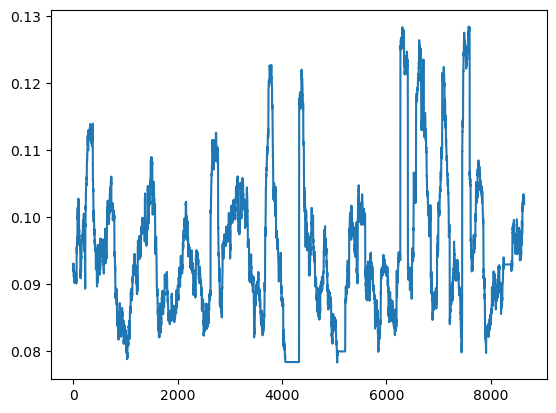

In [110]:
plt.plot(dev_y)

In [94]:
trainPredict

array([[-0.00549989],
       [-0.00518103],
       [-0.00486185],
       ...,
       [ 0.10958385],
       [ 0.10944387],
       [ 0.10963839]], dtype=float32)

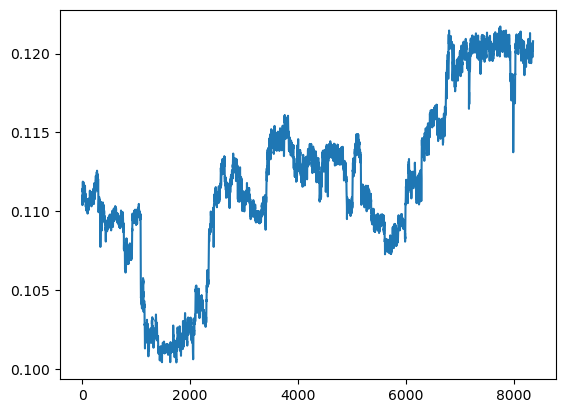

In [103]:
plt.plot(devPredict)

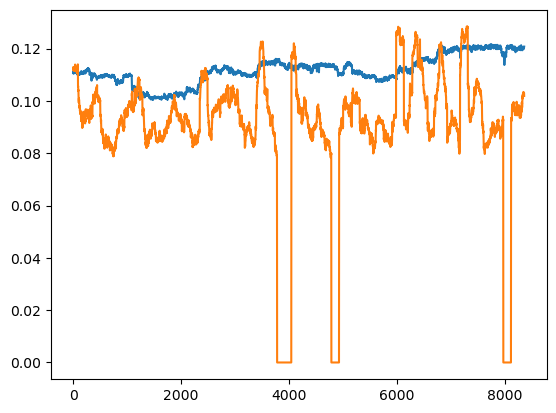

In [102]:
plt.plot(devPredict)
plt.plot(dev_y[24*6*days_look_back:])

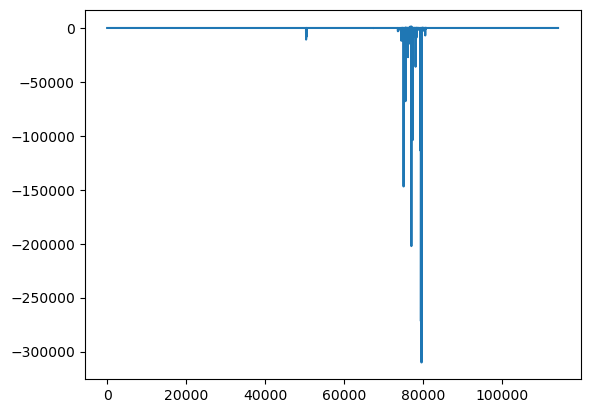

In [96]:
plt.figure()
plt.plot(trainPredict)
#plt.plot(train_y)

In [ ]:
train_y[24*6*days_look_back:]

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.00608316],
       [0.00765859],
       [0.01053154]])

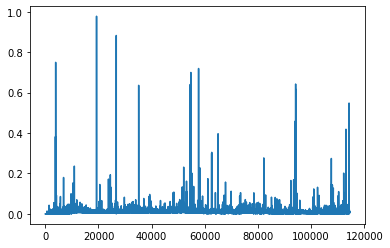

In [ ]:
plt.plot(train_y)

In [ ]:
tmp = vol_df
tmp[tmp>0.1]=np.nan

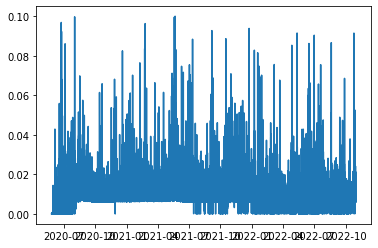

In [ ]:
plt.plot(tmp.fillna(method='ffill'))

In [ ]:
trainPredict_baseline = baseline_model.predict_generator(train_y.reshape(-1,1))
devPredict_baseline  = baseline_model.predict_generator(dev_y.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
days_look_back = 2
n_input = 24*6*days_look_back
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(trainPredict_baseline, train_y)

164.47949337333705

In [ ]:
tmp = trainPredict_baseline
tmp

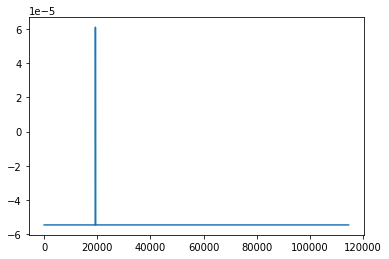

In [ ]:
plt.plot(trainPredict_baseline)

In [ ]:
pd.DataFrame(trainPredict_baseline).to_csv('content/gdrive/My Drive/train_baseline.csv')
pd.DataFrame(trainPredict).to_csv('content/gdrive/My Drive/train_pricevol.csv')

FileNotFoundError: ignored